
[BERNOULLI] Naive Bayes is a classification algorithm for binary (two-class) and multiclass classification problems. It is called Naive Bayes or idiot Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable.

[SVM] You can use a support vector machine (SVM) when your data has exactly two classes. An SVM classifies data by finding the best hyperplane that separates all data points of one class from those of the other class. The best hyperplane for an SVM means the one with the largest margin between the two classes. Margin means the maximal width of the slab parallel to the hyperplane that has no interior data points.

[LOGISTIC REGRESSION] Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1"

[DECISION TREE] Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity



# Let's load the dataset for the final binary classification

In [1]:
import pandas

dataset = pandas.read_csv("dataset.csv", index_col = False, header = 0 )


In [2]:
dataset

,image category,# fixations,mean duration,# clusters,# noise points,silhouette score,CLASS
0,0,23,232.78,2,2,0.71,1
1,0,22,237.73,4,4,0.57,1
2,0,23,238.56,2,2,0.69,1
3,0,27,225.68,4,9,0.33,1
4,0,27,219.90,3,8,0.37,1
...,...,...,...,...,...,...,...
4043,1,22,253.82,2,4,0.59,5
4044,1,23,252.80,4,6,0.39,5
4045,1,15,254.86,2,4,0.47,5
4046,1,26,253.31,2,3,0.43,5


### Describe each column:
* image category is 0 or 1: 0 for clear images, 1 for unclear images
* #fixations is the number of fixations of a participant on a particular image
* mean duration is calculated within all fixations of a participant on a particular image
* #clusters is the number of clusters calculated by DBSCAN, based on the position of fixations of a participant on a particular image
* #noise points is the number of noise points calculated by DBSCAN, always based on the position of fixations
* silhoette score is a score calculated on the number of clusters and of noise points
* CLASS is the label of each row: it's based on the column 'iteration' of the original dataset. The 1st iteration's data are labeled with 1, the 5th iteration's data are labeled with 5

## Let's divide the dataset by column
### We separate the CLASS column from the rest of the dataset, that are the FEATURES extracted.

In [3]:
classification = dataset['CLASS'] #binary classification (1,5)
print(classification)
print('--------')


0       1
1       1
2       1
3       1
4       1
       ..
4043    5
4044    5
4045    5
4046    5
4047    5
Name: CLASS, Length: 4048, dtype: int64
--------


## On FEATURES we perform the scaling to standardize the dataset along axis

In [4]:
from sklearn import preprocessing

Features = dataset[['image category', '# fixations','mean duration','# clusters','# noise points','silhouette score']].values  # be careful with the spaces
print(Features) 
Features = preprocessing.scale(Features) 
print() 
print(Features) 


[[  0.    23.   232.78   2.     2.     0.71]
 [  0.    22.   237.73   4.     4.     0.57]
 [  0.    23.   238.56   2.     2.     0.69]
 ...
 [  1.    15.   254.86   2.     4.     0.47]
 [  1.    26.   253.31   2.     3.     0.43]
 [  1.    29.   250.77   2.     6.     0.5 ]]

[[-0.63185405  0.16169204 -0.59591636 -0.48214976 -0.83408532  1.51527762]
 [-0.63185405 -0.05633906 -0.41459772  1.27301411 -0.0975283   0.58522289]
 [-0.63185405  0.16169204 -0.3841948  -0.48214976 -0.83408532  1.38241266]
 ...
 [ 1.58264396 -1.58255679  0.21287467 -0.48214976 -0.0975283  -0.07910192]
 [ 1.58264396  0.81578535  0.15609812 -0.48214976 -0.46580681 -0.34483184]
 [ 1.58264396  1.46987866  0.06305785 -0.48214976  0.63902872  0.12019553]]


## Let's split the dataset: 70-30

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Features, classification, test_size=0.3, random_state=42)
print(X_train.shape)

(2833, 6)


# GRIDSEARCHCV

## This is an approach to find the best classifier and the best values

## KEEP IN MIND:

* ### ACCURACY = the most intuitive performance measure. It's a ratio of correctly predicted observation to the total observations.

* ### PRECISION = the ratio of correctly predicted positive observations to the total predicted positive observation: when it will predict '5', how many actually will be '5'?

* ### RECALL: is the sensitivity. The ratio of correctly predicted positive observations to thenumber of all samples that should have been identified as '5': of all rows that will be '5', how many did we label as '5'?

* ### F1SCORE: is the weighted average of Precision and Recall. 

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score


## Let's try with these parameters of SVM classifier

In [7]:
params_SVM = {
            'C' : [1,2,5,10,20],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

In [8]:
clf_svm = GridSearchCV(svm.SVC(random_state = 42), params_SVM, cv=5, verbose = 1)
clf_svm.fit(X_train, y_train)

print("Best parameters set found on developmen set:\n",clf_svm.best_params_)
print("\nGrid scores on development set:\n")
print()
means1 = clf_svm.cv_results_['mean_test_score']
stds1 = clf_svm.cv_results_['std_test_score']
for mean1, std1, params in zip(means1, stds1, clf_svm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean1, std1 * 2, params))
print()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters set found on developmen set:
 {'C': 2, 'kernel': 'rbf'}

Grid scores on development set:


0.676 (+/-0.036) for {'C': 1, 'kernel': 'linear'}
0.658 (+/-0.027) for {'C': 1, 'kernel': 'poly'}
0.743 (+/-0.019) for {'C': 1, 'kernel': 'rbf'}
0.536 (+/-0.041) for {'C': 1, 'kernel': 'sigmoid'}
0.676 (+/-0.037) for {'C': 2, 'kernel': 'linear'}
0.647 (+/-0.024) for {'C': 2, 'kernel': 'poly'}
0.748 (+/-0.025) for {'C': 2, 'kernel': 'rbf'}
0.535 (+/-0.044) for {'C': 2, 'kernel': 'sigmoid'}
0.677 (+/-0.038) for {'C': 5, 'kernel': 'linear'}
0.643 (+/-0.027) for {'C': 5, 'kernel': 'poly'}
0.747 (+/-0.030) for {'C': 5, 'kernel': 'rbf'}
0.535 (+/-0.042) for {'C': 5, 'kernel': 'sigmoid'}
0.676 (+/-0.039) for {'C': 10, 'kernel': 'linear'}
0.643 (+/-0.022) for {'C': 10, 'kernel': 'poly'}
0.742 (+/-0.033) for {'C': 10, 'kernel': 'rbf'}
0.535 (+/-0.042) for {'C': 10, 'kernel': 'sigmoid'}
0.676 (+/-0.039) for {'C': 20, 'kernel': 'linear'}
0.643 (+/-0.022) for {'C': 20, 'kernel': 'poly'}
0.734

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.3s finished


In [9]:
from sklearn import metrics

best_estimator1 = clf_svm.best_estimator_
preds_svm = best_estimator1.predict(X_test)
print(metrics.classification_report(y_test, preds_svm))

accuracy_svm = accuracy_score(y_test, preds_svm)
print("Accuracy", accuracy_svm)

              precision    recall  f1-score   support

           1       0.81      0.72      0.76       644
           5       0.72      0.81      0.76       571

    accuracy                           0.76      1215
   macro avg       0.76      0.76      0.76      1215
weighted avg       0.76      0.76      0.76      1215

Accuracy 0.7580246913580246


## Now let's try with Logistic regression

In [10]:
params_logistic = {
            'C': [0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1,2],
            'penalty': ['l1', 'l2']
}

    

In [11]:
clf_logreg= GridSearchCV(LogisticRegression(solver = 'liblinear',random_state = 42), params_logistic, cv=5, verbose = 1)
clf_logreg.fit(X_train, y_train)

print("Best parameters set found on developmen set:\n",clf_logreg.best_params_)
print("\nGrid scores on development set:\n")
print()
means2 = clf_logreg.cv_results_['mean_test_score']
stds2 = clf_logreg.cv_results_['std_test_score']
for mean2, std2, params in zip(means2, stds2, clf_logreg.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean2, std2 * 2, params))
print()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters set found on developmen set:
 {'C': 0.05, 'penalty': 'l1'}

Grid scores on development set:


0.652 (+/-0.030) for {'C': 0.005, 'penalty': 'l1'}
0.650 (+/-0.037) for {'C': 0.005, 'penalty': 'l2'}
0.654 (+/-0.032) for {'C': 0.01, 'penalty': 'l1'}
0.653 (+/-0.035) for {'C': 0.01, 'penalty': 'l2'}
0.661 (+/-0.043) for {'C': 0.05, 'penalty': 'l1'}
0.656 (+/-0.040) for {'C': 0.05, 'penalty': 'l2'}
0.661 (+/-0.035) for {'C': 0.1, 'penalty': 'l1'}
0.654 (+/-0.036) for {'C': 0.1, 'penalty': 'l2'}
0.656 (+/-0.035) for {'C': 0.2, 'penalty': 'l1'}
0.653 (+/-0.036) for {'C': 0.2, 'penalty': 'l2'}
0.655 (+/-0.034) for {'C': 0.5, 'penalty': 'l1'}
0.653 (+/-0.034) for {'C': 0.5, 'penalty': 'l2'}
0.654 (+/-0.034) for {'C': 1, 'penalty': 'l1'}
0.652 (+/-0.033) for {'C': 1, 'penalty': 'l2'}
0.653 (+/-0.034) for {'C': 2, 'penalty': 'l1'}
0.652 (+/-0.033) for {'C': 2, 'penalty': 'l2'}



[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


In [12]:
best_estimator2 = clf_logreg.best_estimator_
preds2 = best_estimator2.predict(X_test)
print(metrics.classification_report(y_test, preds2))

accuracy_logreg = accuracy_score(y_test, preds2)
print("Accuracy", accuracy_logreg)

              precision    recall  f1-score   support

           1       0.69      0.72      0.70       644
           5       0.67      0.63      0.65       571

    accuracy                           0.68      1215
   macro avg       0.68      0.68      0.68      1215
weighted avg       0.68      0.68      0.68      1215

Accuracy 0.6781893004115226


## Let's try with Bernoulli

In [13]:
params_bernoulli = {
            'binarize': [0.0025, 0.005, 0.007, 0.01, 0.05, 0.1, 0.2, 0.5, 1],
}

    

In [14]:
clf_bernoulli = GridSearchCV(BernoulliNB(), params_bernoulli, cv=5, verbose = 1)
clf_bernoulli.fit(X_train, y_train)

print("Best parameters set found on developmen set:\n",clf_bernoulli.best_params_)
print("\nGrid scores on development set:\n")
print()
means3 = clf_bernoulli.cv_results_['mean_test_score']
stds3 = clf_bernoulli.cv_results_['std_test_score']
for mean3, std3, params in zip(means3, stds3, clf_bernoulli.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean3, std3 * 2, params))
print()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters set found on developmen set:
 {'binarize': 0.005}

Grid scores on development set:


0.651 (+/-0.033) for {'binarize': 0.0025}
0.652 (+/-0.033) for {'binarize': 0.005}
0.650 (+/-0.037) for {'binarize': 0.007}
0.649 (+/-0.037) for {'binarize': 0.01}
0.641 (+/-0.036) for {'binarize': 0.05}
0.630 (+/-0.035) for {'binarize': 0.1}
0.611 (+/-0.041) for {'binarize': 0.2}
0.572 (+/-0.049) for {'binarize': 0.5}
0.544 (+/-0.042) for {'binarize': 1}



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [15]:
best_estimator3 = clf_bernoulli.best_estimator_
preds3 = best_estimator3.predict(X_test)
print(metrics.classification_report(y_test, preds3))

accuracy_bernoulli = accuracy_score(y_test, preds3)
print("Accuracy", accuracy_bernoulli)

              precision    recall  f1-score   support

           1       0.69      0.73      0.71       644
           5       0.67      0.64      0.65       571

    accuracy                           0.68      1215
   macro avg       0.68      0.68      0.68      1215
weighted avg       0.68      0.68      0.68      1215

Accuracy 0.6831275720164609


## Let's try Decision Tree!

In [16]:
params_decisiontree = {
            'criterion' : ['gini', 'entropy'],
            'max_depth': [3,4,5, None]
        }

       


In [17]:
clf_tree = GridSearchCV(tree.DecisionTreeClassifier(random_state = 42), params_decisiontree, cv=5, verbose = 1)
clf_tree.fit(X_train, y_train)

print("Best parameters set found on developmen set:\n",clf_tree.best_params_)
print("\nGrid scores on development set:\n")
print()
means4 = clf_tree.cv_results_['mean_test_score']
stds4 = clf_tree.cv_results_['std_test_score']
for mean4, std4, params in zip(means4, stds4, clf_tree.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean4, std4 * 2, params))
print()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on developmen set:
 {'criterion': 'gini', 'max_depth': 5}

Grid scores on development set:


0.734 (+/-0.054) for {'criterion': 'gini', 'max_depth': 3}
0.743 (+/-0.050) for {'criterion': 'gini', 'max_depth': 4}
0.744 (+/-0.038) for {'criterion': 'gini', 'max_depth': 5}
0.674 (+/-0.036) for {'criterion': 'gini', 'max_depth': None}
0.728 (+/-0.051) for {'criterion': 'entropy', 'max_depth': 3}
0.731 (+/-0.046) for {'criterion': 'entropy', 'max_depth': 4}
0.735 (+/-0.050) for {'criterion': 'entropy', 'max_depth': 5}
0.680 (+/-0.031) for {'criterion': 'entropy', 'max_depth': None}



In [18]:
best_estimator4 = clf_tree.best_estimator_
preds4 = best_estimator4.predict(X_test)
print(metrics.classification_report(y_test, preds4))

accuracy_dt = accuracy_score(y_test, preds4)
print("Accuracy", accuracy_dt)

              precision    recall  f1-score   support

           1       0.81      0.70      0.75       644
           5       0.71      0.81      0.76       571

    accuracy                           0.75      1215
   macro avg       0.76      0.76      0.75      1215
weighted avg       0.76      0.75      0.75      1215

Accuracy 0.7539094650205761


## Which features mattered most?

              precision    recall  f1-score   support

           1       0.81      0.70      0.75       644
           5       0.71      0.81      0.76       571

    accuracy                           0.75      1215
   macro avg       0.76      0.76      0.75      1215
weighted avg       0.76      0.75      0.75      1215

{'image category': 0.011169295050306565, '# fixations': 0.0, 'mean duration': 0.7480918017456407, '# clusters': 0.014560689201692087, '# noise points': 0.17662851284575215, 'silhouette score': 0.04954970115660856}


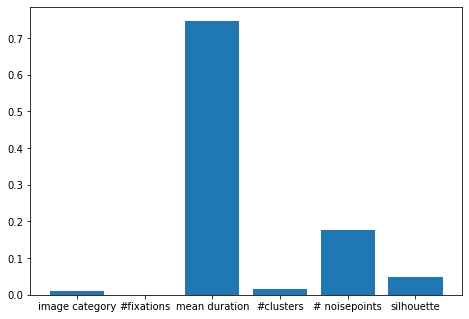

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# define the model
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 5)
# fit the model
model.fit(X_train, y_train)
preds_lr = model.predict(X_test)
print(metrics.classification_report(y_test, preds_lr))

# get importance
importance = model.feature_importances_
# print(importance)
toGetFeatImportance = dataset.drop(['CLASS'], axis=1)
# (toGetFeatImportance)
feature_importance = dict(zip(toGetFeatImportance.columns, model.feature_importances_))

print(feature_importance)
# value_importance = []
# i = 0
# for key, value in feature_importance.items():
#     print("%s : %f" % (key, value))
#     value_importance
    
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = [feature_importance["image category"], feature_importance["# fixations"], feature_importance['mean duration'],
            feature_importance['# clusters'], feature_importance["# noise points"], feature_importance["silhouette score"]]
labels = ['image category', '#fixations', 'mean duration', '#clusters', '# noisepoints', 'silhouette']
ax.bar(labels,values)
plt.show()
    

# Let's compare the best and the worst results!


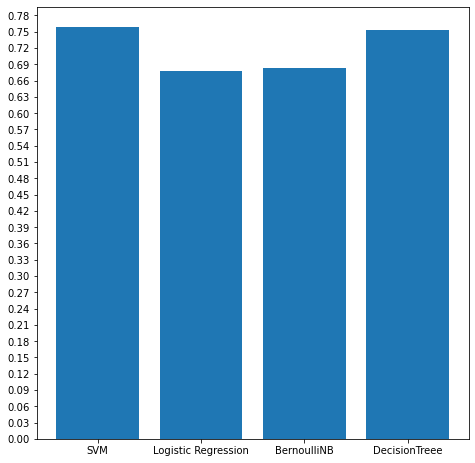

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1.5])
plt.yticks(np.arange(0, 1, 0.03))
values = [accuracy_svm, accuracy_logreg, accuracy_bernoulli, accuracy_dt]
labels = ['SVM', 'Logistic Regression', 'BernoulliNB', 'DecisionTreee']
ax.bar(labels,values)
plt.show()


## Best: SVM and DECISION TREE
## Worst: BERNOULLI


### Start from SVM

['TN=461', 'FP=183', 'FN=111', 'TP=460']


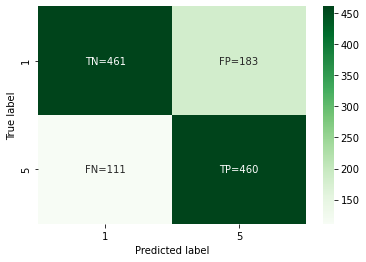

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_test, preds_svm)
tn, fp, fn, tp = cf_matrix.ravel()
labels = ['TN=%d'%tn,"FP=%d"%fp,"FN=%d"%fn,"TP=%d"%tp]
print(labels)
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')
axis_labels = ['1', '5']
plt.xticks([0.5,1.5], axis_labels)
plt.yticks([0.5,1.5], axis_labels)

plt.show()


## Let's make some observations on this confusion matrix: of course, these will be applicable also to the next confusion matrices.

## TP = True Positive, TN = True Negative (respectively 458 and 430)
These are correct predictions.

## FP = False Positive, FN = False Negative (respectively 204 and 123)
These are wrong predictions.

The classifier made a total of 1215 prediction:
* TP:458 CORRECTLY labeled with 1
* TN:430 CORRECTLY labeled with 5
* FP:204 WRONGLY labeled with 1 (they were 5)
* FN:123 WRONGLY labeled with 5 (they were 1)


### Accuracy = TP+TN/TP+FP+FN+TN
### Precision = TP/TP+FP
### Recall = TP/TP+FN
### F1 Score = 2*(Recall * Precision) / (Recall + Precision)









### Go on with Decision Tree

['TN=453', 'FP=191', 'FN=108', 'TP=463']


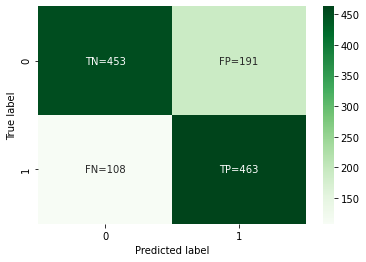

In [22]:
cf_matrix = confusion_matrix(y_test, preds4)
tn, fp, fn, tp = cf_matrix.ravel()
labels = ['TN=%d'%tn,"FP=%d"%fp,"FN=%d"%fn,"TP=%d"%tp]
print(labels)
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## The worst: BERNOULLI NB!

['TN=467', 'FP=177', 'FN=208', 'TP=363']


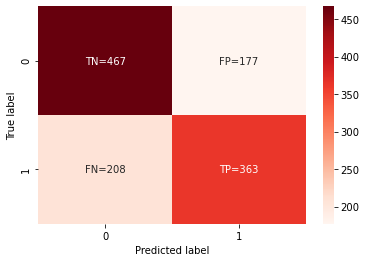

In [23]:
cf_matrix = confusion_matrix(y_test, preds3)
tn, fp, fn, tp = cf_matrix.ravel()
labels = ['TN=%d'%tn,"FP=%d"%fp,"FN=%d"%fn,"TP=%d"%tp]
print(labels)
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Let's try with a ANN!

In [24]:
import keras

Using TensorFlow backend.


In [25]:
from keras.models import Sequential #because our net is very simple
from keras.layers import Dense #a fully connected layer that will fully connect input to output: every input will arrive to the output

## Let's tune Batch Size and Number of Epochs

INPUT LAYER: 
* input dimension = 6  (7 columns - CLASS column)
* units = 4. Why 4? Our hidden layer will have n nodes, where n is the mean of the sum of the number of input nodes and the number of output nodes: we have 6 input nodes and just 1 output nodes (BINARY CLASSIFICATION: 0 or 1, so just one output). The mean is 3.5: let's choose 4 to start.
* try with relu as activation function for the first 2 layers, but then we'll tune also this parameter
* clearly sigmoid as activation function for the output layer: predictions are binary.

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(Features, classification, test_size=0.3, random_state=1)


In [27]:
print(X_train.shape)
print(X_test.shape)

(2833, 6)
(1215, 6)


In [28]:
# # Use scikit-learn to grid search the batch size and epochs

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(input_dim=6, units=4, activation='relu')) #input layer
    model.add(Dense(units=4, activation="relu")) #hidden layer
    model.add(Dense(1, activation='sigmoid')) #output layer
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# # fix random seed for reproducibility
# seed = 7
# numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [2, 8, 16, 32, 64, 128, 256, 512]
epochs = [10, 50, 100, 150, 200, 300]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print()
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.741281 using {'batch_size': 8, 'epochs': 150}

0.709873 (0.030797) with: {'batch_size': 2, 'epochs': 10}
0.723279 (0.020852) with: {'batch_size': 2, 'epochs': 50}
0.728219 (0.021904) with: {'batch_size': 2, 'epochs': 100}
0.728220 (0.028270) with: {'batch_size': 2, 'epochs': 150}
0.726805 (0.017206) with: {'batch_size': 2, 'epochs': 200}
0.729628 (0.022506) with: {'batch_size': 2, 'epochs': 300}
0.676654 (0.045283) with: {'batch_size': 8, 'epochs': 10}
0.722212 (0.018856) with: {'batch_size': 8, 'epochs': 50}
0.727167 (0.029638) with: {'batch_size': 8, 'epochs': 100}
0.741281 (0.021973) with: {'batch_size': 8, 'epochs': 150}
0.740923 (0.026548) with: {'batch_size': 8, 'epochs': 200}
0.730685 (0.017583) with: {'batch_size': 8, 'epochs': 300}
0.663989 (0.046100) with: {'batch_size': 16, 'epochs': 10}
0.729628 (0.021517) with: {'batch_size': 16, 'epochs': 50}
0.717613 (0.020742) with: {'batch_size': 16, 'epochs': 100}
0.731397 (0.022307) with: {'batch_size': 16, 'epochs': 150}
0.7

# LET'S TEST THESE PARAMETERS

In [29]:
# X_train, X_test, y_train, y_test = train_test_split(Features, classification, test_size=0.3, random_state=1)
best_net = grid.best_estimator_
print("These are the best parameters: ",grid.best_params_)
print("This is the best accuracy: ",grid.best_score_)
y_pred = best_net.predict(X_test)

best_batchsize = grid.best_params_['batch_size']

best_epochs = grid.best_params_['epochs']


These are the best parameters:  {'batch_size': 8, 'epochs': 150}
This is the best accuracy:  0.7412810564041138


In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.62      0.71       644
           5       0.66      0.85      0.75       571

    accuracy                           0.73      1215
   macro avg       0.74      0.73      0.73      1215
weighted avg       0.75      0.73      0.73      1215



In [31]:
y_pred= y_pred[:,0] #transform y_pred in a vector to compare it with y_test (from (1215,1) to (1215,))

y_pred = np.array(y_pred)

y_test = np.array(y_test)
print(y_pred.shape, y_test.shape)
first_acc = len(y_pred[y_pred==y_test])/len(y_test) #comparison between predicted values and y_test


print("ACCURACY: ",first_acc) 

(1215,) (1215,)
ACCURACY:  0.7275720164609053


## LET'S TUNE OTHER PARAMETERS, USING BEST PARAMS JUST OBTAINED

In [32]:
# Function to create model, required for KerasClassifier
def create_model(init_mode=''):
    # create model
    model = Sequential()
    model.add(Dense(input_dim=6, units=4, kernel_initializer=init_mode, activation='relu')) #input
    model.add(Dense(units=4, kernel_initializer=init_mode, activation="relu")) #hidden
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid')) #output layer
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    # create model
    
model = KerasClassifier(build_fn=create_model, epochs=best_epochs, batch_size=best_batchsize, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.727151 using {'init_mode': 'he_normal'}
0.705259 (0.023381) with: {'init_mode': 'uniform'}
0.723621 (0.016593) with: {'init_mode': 'normal'}
0.508295 (0.005644) with: {'init_mode': 'zero'}
0.724677 (0.006726) with: {'init_mode': 'glorot_normal'}
0.718678 (0.013403) with: {'init_mode': 'glorot_uniform'}
0.727151 (0.013848) with: {'init_mode': 'he_normal'}


In [33]:
best_net2 = grid.best_estimator_
print("These is the best parameter:",grid.best_params_)
print("This is the best accuracy", grid.best_score_)
y_pred2 = best_net2.predict(X_test)

best_initmode = grid.best_params_['init_mode']


These is the best parameter: {'init_mode': 'he_normal'}
This is the best accuracy 0.7271507779757181


In [34]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.76      0.73      0.75       644
           5       0.71      0.74      0.73       571

    accuracy                           0.74      1215
   macro avg       0.74      0.74      0.74      1215
weighted avg       0.74      0.74      0.74      1215



In [35]:
y_pred2 = y_pred2[:,0] #transform y_pred in a vector to compare it with y_test (from (1215,1) to (1215,))

y_pred2 = np.array(y_pred2)

y_test = np.array(y_test)
# print(y_pred.shape, y_test.shape)

second_acc = len(y_pred2[y_pred2==y_test])/len(y_test) #comparison between predicted values and y_test
print("ACCURACY:" ,second_acc)

ACCURACY: 0.7366255144032922
